In [1]:
from collections import defaultdict

import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_json(path):
    with open(path) as f:
        data = json.load(f)
    return data

# Baseline

In [3]:
tv = read_json('../results/00_baseline/tv.json')
reli = read_json('../results/00_baseline/reli.json')

In [4]:
results_dict = defaultdict(list)
for name, results in zip(['tv', 'reli'], [tv, reli]):
    for metric in ('precision', 'recall', 'f1'):
        results_dict['name'].append(name.capitalize())
        results_dict['metric'].append(results['results'][metric])
        results_dict['metric_name'].append(metric.capitalize())

In [5]:
results_df = pd.DataFrame(results_dict)
results_df

,name,metric,metric_name
0,Tv,0.821739,Precision
1,Tv,0.825328,Recall
2,Tv,0.823529,F1
3,Reli,0.586736,Precision
4,Reli,0.625441,Recall
5,Reli,0.605047,F1


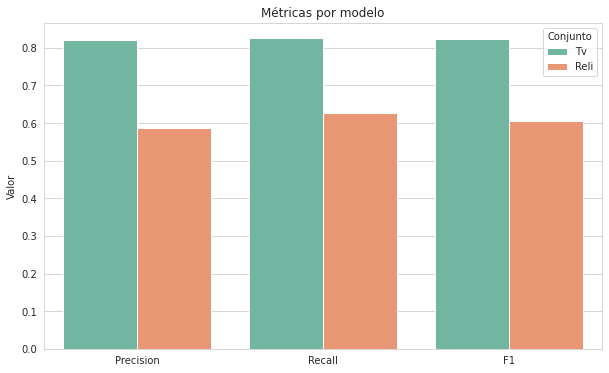

In [6]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.barplot(
    x='metric_name',
    y='metric',
    hue='name',
    data=results_df,
    palette='Set2'
)

# sns.despine(left=False)
plt.legend(title='Conjunto')
plt.xlabel('')
plt.ylabel('Valor')
plt.title('Métricas por modelo')
plt.savefig('../images/baseline.png', bbox_inches='tight')
plt.show()

# BERTvisio and LiteraBERT

In [ ]:
...

# Double Embedding

In [7]:
tv = read_json('../results/03_fine_tuning/tv/d_bert_visio.json')
reli = read_json('../results/03_fine_tuning/reli/d_litera_bert.json')

In [8]:
results_dict = defaultdict(list)
for name, results in zip(['d-BERTvisio', 'd-LiteraBERT'], [tv, reli]):
    for metric in ('precision', 'recall', 'f1'):
        results_dict['name'].append(name)
        results_dict['metric'].append(results['results'][metric])
        results_dict['metric_name'].append(metric.capitalize())

In [9]:
results_df = pd.DataFrame(results_dict)
results_df

,name,metric,metric_name
0,d-BERTvisio,0.800000,Precision
1,d-BERTvisio,0.837607,Recall
2,d-BERTvisio,0.818372,F1
3,d-LiteraBERT,0.578261,Precision
4,d-LiteraBERT,0.490775,Recall
5,d-LiteraBERT,0.530938,F1


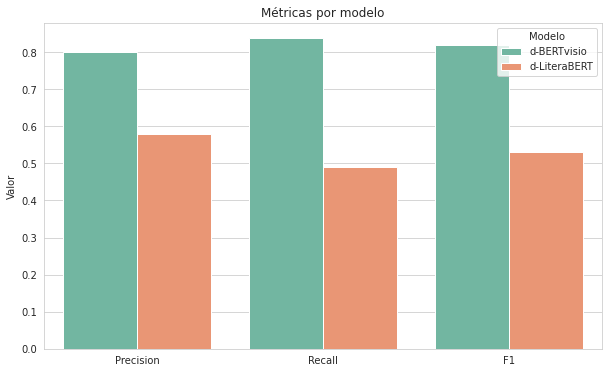

In [10]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.barplot(
    x='metric_name',
    y='metric',
    hue='name',
    data=results_df,
    palette='Set2'
)

# sns.despine(left=False)
plt.legend(title='Modelo')
plt.xlabel('')
plt.ylabel('Valor')
plt.title('Métricas por modelo')
plt.savefig('../images/duplo_embedding_1.png', bbox_inches='tight')
plt.show()

In [11]:
tv = read_json('../results/03_fine_tuning/tv/d_bert_visio_ffn.json')
reli = read_json('../results/03_fine_tuning/reli/d_litera_bert_ffn.json')

In [12]:
results_dict = defaultdict(list)
for name, results in zip(['d-BERTvisio-FFN', 'd-LiteraBERT-FFN'], [tv, reli]):
    for metric in ('precision', 'recall', 'f1'):
        results_dict['name'].append(name)
        results_dict['metric'].append(results['results'][metric])
        results_dict['metric_name'].append(metric.capitalize())

In [13]:
results_df = pd.DataFrame(results_dict)
results_df

,name,metric,metric_name
0,d-BERTvisio-FFN,0.800000,Precision
1,d-BERTvisio-FFN,0.871795,Recall
2,d-BERTvisio-FFN,0.834356,F1
3,d-LiteraBERT-FFN,0.640000,Precision
4,d-LiteraBERT-FFN,0.472325,Recall
5,d-LiteraBERT-FFN,0.543524,F1


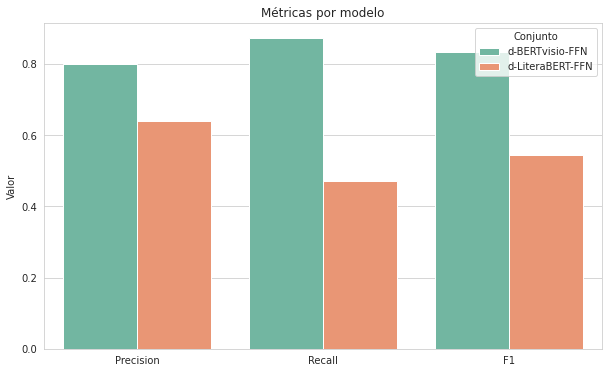

In [14]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.barplot(
    x='metric_name',
    y='metric',
    hue='name',
    data=results_df,
    palette='Set2'
)

# sns.despine(left=False)
plt.legend(title='Conjunto')
plt.xlabel('')
plt.ylabel('Valor')
plt.title('Métricas por modelo')
plt.savefig('../images/duplo_embedding_2.png', bbox_inches='tight')
plt.show()